In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 0. EDA

In [101]:
# import data

df = sns.load_dataset("mpg") 
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


#### 0 a) EDA

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [103]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [104]:
df = df.dropna() # removing rows with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


#### 0 b) desribe() on only relevant columns

In [105]:
df['origin'].head()

0    usa
1    usa
2    usa
3    usa
4    usa
Name: origin, dtype: object

In [106]:
df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']].describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


#### 0 c) some plots

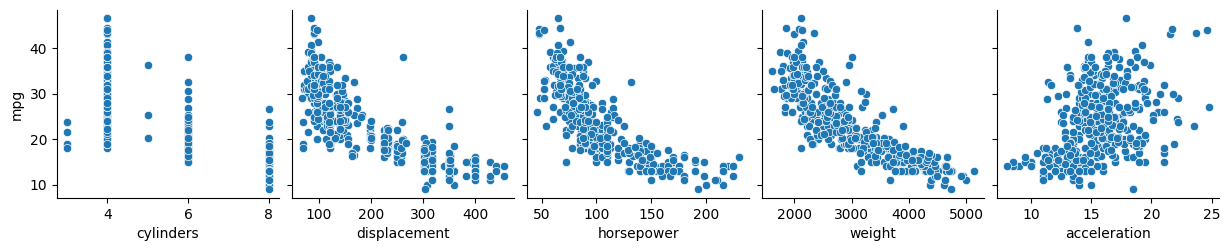

In [107]:
# plots of mpg as function of other parameters
sns.pairplot(df, y_vars='mpg', x_vars=['cylinders','displacement', 'horsepower', 'weight', 'acceleration'])

#### 0 d) drop non-interesting columns

In [108]:
# dropping 'origin' and 'name'
df.drop(columns= ['origin', 'name'], inplace=True)
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70


### 1. Train|test split

In [144]:
from sklearn.model_selection import train_test_split

X, y = df.drop(columns='mpg'), df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.head(), X.shape, y.head(), y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

(   cylinders  displacement  horsepower  weight  acceleration  model_year
 0          8         307.0       130.0    3504          12.0          70
 1          8         350.0       165.0    3693          11.5          70
 2          8         318.0       150.0    3436          11.0          70
 3          8         304.0       150.0    3433          12.0          70
 4          8         302.0       140.0    3449          10.5          70,
 (392, 6),
 0    18.0
 1    15.0
 2    18.0
 3    16.0
 4    17.0
 Name: mpg, dtype: float64,
 (392,),
 (313, 6),
 (79, 6),
 (313,),
 (79,))

### 2. Function for evaluation

#### First step by step for OLS

In [110]:
# scale X data with Stadard score scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [111]:
# apply linear regression on training data

from sklearn.linear_model import LinearRegression

model_OLS = LinearRegression()
model_OLS.fit(scaled_X_train, y_train)
print(f"Parameters: {model_OLS.coef_}")             # beta_1, beta_2, ..., beta_6
print(f"Intercept: {model_OLS.intercept_}")         # beta_0

Parameters: [-0.19723011  0.10499657 -0.08700746 -5.5098621   0.17368415  2.75679957]
Intercept: 23.599361022364224


In [112]:
# predict y on scaled X_test data
y_pred_OLS = model_OLS.predict(scaled_X_test)
y_pred_OLS[:5], y_pred_OLS.shape

(array([25.93279618, 26.29927859, 32.96548909, 26.8544302 , 29.45372581]),
 (79,))

In [113]:
# evaluate model

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_OLS = mean_absolute_error(y_test, y_pred_OLS)
mse_OLS = mean_squared_error(y_test, y_pred_OLS)
rmse_OLS = np.sqrt(mse_OLS)

mae_OLS, mse_OLS, rmse_OLS

(2.5038600897761234, 10.502370329417294, 3.240736078334256)

#### Second building a function from steps above

In [133]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

def regression_model_evaluation(X_train, X_test, y_train, y_test, model): #TODO make "model" to be a choice of certain models and not free text
    """Evaluates a regression model and returns metrics. In data "model" can be for example LinjearRegression(), SGDRegressor(), PolynomialFeatures(degree=n)"""

    model = model
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
   
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return mae, mse, rmse

In [134]:
# using regression_model_evaluation() for LinjearRegression() from data abovve
mae, mse, rmse = regression_model_evaluation(X_train, X_test, y_train, y_test, LinearRegression()) # NOTE: scaled training data -> same output
mae, mse, rmse

(2.503860089776125, 10.502370329417303, 3.2407360783342574)

### 3. Compare models

In [141]:
# preprocessing for polynomial fit 
poly = PolynomialFeatures(1)
poly_1d_X_train = poly.fit_transform(X_train)
poly_1d_X_test = poly.fit_transform(X_test)

poly = PolynomialFeatures(2)
poly_2d_X_train = poly.fit_transform(X_train)
poly_2d_X_test = poly.fit_transform(X_test)

poly = PolynomialFeatures(3)
poly_3d_X_train = poly.fit_transform(X_train)
poly_3d_X_test = poly.fit_transform(X_test)

# preprocessing with Standard scaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# TODO find a more general way to preprocess, possibly add pre-processing step to regression_model_evaluation()

In [143]:
lin_reg = regression_model_evaluation(X_train, X_test, y_train, y_test, LinearRegression())
lin_reg_scaled = regression_model_evaluation(scaled_X_train, scaled_X_test, y_train, y_test, LinearRegression())
sgd_scaled = regression_model_evaluation(scaled_X_train, scaled_X_test, y_train, y_test, SGDRegressor())
poly_lin_reg_1 = regression_model_evaluation(poly_1d_X_train, poly_1d_X_test, y_train, y_test, LinearRegression())
poly_lin_reg_2 = regression_model_evaluation(poly_2d_X_train, poly_2d_X_test, y_train, y_test, LinearRegression())
poly_lin_reg_3 = regression_model_evaluation(poly_3d_X_train, poly_3d_X_test, y_train, y_test, LinearRegression())

df_eval_matrix = pd.DataFrame(index=["mae", "mse", "rmse"]) 
df_eval_matrix["lin_reg"] = lin_reg
df_eval_matrix["lin_reg_scaled"] = lin_reg_scaled
df_eval_matrix["sgd_scaled"] = sgd_scaled
df_eval_matrix["poly_lin_reg_1"] = poly_lin_reg_1
df_eval_matrix["poly_lin_reg_2"] = poly_lin_reg_2
df_eval_matrix["poly_lin_reg_3"] = poly_lin_reg_3

df_eval_matrix

#TODO find a less repetitive way to create the df

,lin_reg,lin_reg_scaled,sgd_scaled,poly_lin_reg_1,poly_lin_reg_2,poly_lin_reg_3
mae,2.503860,2.503860,2.538293,2.503860,1.979159,2.297251
mse,10.502370,10.502370,10.902977,10.502370,7.146216,10.918757
rmse,3.240736,3.240736,3.301966,3.240736,2.673241,3.304354
